In [5]:
# Imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import numpy as np
import hvplot.pandas

In [6]:
# Read the Mapbox API Key
load_dotenv()


True

In [7]:
MapBox_Key=os.getenv("MapBox_Key")
type(MapBox_Key)

str

In [8]:
Census_Data = pd.read_csv('census_data.csv', index_col = "year")
Census_Data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [9]:
# Dwelling Types Per Year
#Calculate the sum number of dwelling types units per year
Dwelling_Units = Census_Data.groupby('year').sum()
Dwelling_Units

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040,40583604,118563,152031
2006,266860,379400,165,69430,54690,44095,162850,1335,59368353,184352,129558
2011,274940,429220,100,72480,60355,44750,163895,2165,74259461,202750,142771
2016,269680,493270,95,71200,61565,48585,165575,2845,92969566,246584,175885


In [10]:
Dwelling_Units.to_csv("Sum_Dwelling_Units")

In [11]:
# Drop Average house Value, and Shelter costs
Dwelling_Unit=Dwelling_Units.drop(["average_house_value", 'shelter_costs_owned', 'shelter_costs_rented'], axis=1)

In [12]:
# Create a Bar plot per year to show the number of dwelling types
Dwelling_Unit.hvplot.bar(title="Dwelling Types", groupby="year", x="index", rot=90, frame_width=800, frame_height=300).opts(yformatter="%.0f")

:DynamicMap   [year]
   :Bars   [index,Variable]   (value)

In [13]:
# Calculate the average monthly shelter costs for owned and rented dwellings
Census_Data_Mean = Census_Data.groupby('year').mean()
Census_Data_Mean

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,
2001,2149.500000,2535.821429,0.535714,649.964286,373.964286,169.892857,835.000000,21.714286,289882.885714,846.878571,1085.935714
2006,1906.142857,2710.000000,1.178571,495.928571,390.642857,314.964286,1163.214286,9.535714,424059.664286,1316.800000,925.414286
2011,1963.857143,3065.857143,0.714286,517.714286,431.107143,319.642857,1170.678571,15.464286,530424.721429,1448.214286,1019.792857
2016,1926.285714,3523.357143,0.678571,508.571429,439.750000,347.035714,1182.678571,20.321429,664068.328571,1761.314286,1256.321429


In [14]:
Shelter_Cost = Census_Data_Mean.drop(["average_house_value", "single_detached_house", "apartment_five_storeys_plus", "movable_dwelling",
                                 "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house"], axis=1)
Shelter_Cost

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


<AxesSubplot:title={'center':'Average Monthly Shelter Cost for Owned Dwellings in Toronto'}, xlabel='Year', ylabel='Avg Monthly Shelter Costs'>

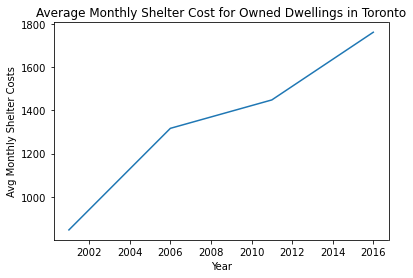

In [15]:
# Create line chart for the yearly shelter costs for owned dwelling
Shelter_Cost_Owned = Shelter_Cost["shelter_costs_owned"]
Shelter_Cost_Owned.plot.line(title="Average Monthly Shelter Cost for Owned Dwellings in Toronto", xlabel="Year", ylabel="Avg Monthly Shelter Costs")

<AxesSubplot:title={'center':'Average Monthly Shelter Cost for Rented Dwellings in Toronto'}, xlabel='Year', ylabel='Avg Monthly Shelter Costs'>

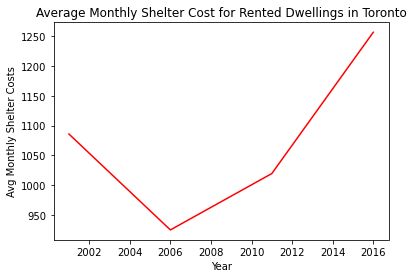

In [16]:
Shelter_Cost_Rented = Shelter_Cost["shelter_costs_rented"]
Shelter_Cost_Rented.plot.line(title="Average Monthly Shelter Cost for Rented Dwellings in Toronto", xlabel="Year", ylabel="Avg Monthly Shelter Costs", color = "Red")

In [17]:
# Average House Value per Year
Average_House_Value = Census_Data_Mean["average_house_value"]
Average_House_Value

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

<AxesSubplot:title={'center':'Average House Value in Toronto'}, xlabel='Year', ylabel='Avg. House Value'>

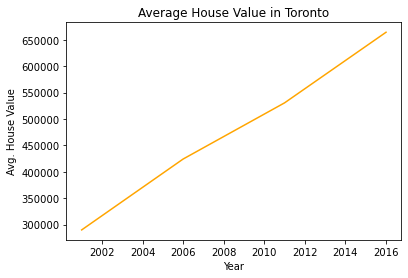

In [18]:
Average_House_Value.plot.line(title="Average House Value in Toronto", xlabel="Year", ylabel='Avg. House Value', color="orange")

In [19]:
# Average House Value by Neighbourhood
Neighbourhood_House_Value = Census_Data.drop(["shelter_costs_owned", "shelter_costs_rented", "single_detached_house", "apartment_five_storeys_plus", "movable_dwelling",
                                 "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house"], axis=1)
Neighbourhood_House_Value.reset_index()

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864
...,...,...,...
555,2016,Wychwood,787760
556,2016,Yonge-Eglinton,1127052
557,2016,Yonge-St.Clair,1131888
558,2016,York University Heights,425769


In [20]:
Neighbourhood_Ann_House_Value = Census_Data.groupby([Census_Data.index, "neighbourhood"]).mean()
Avg_House_Value = Neighbourhood_Ann_House_Value["average_house_value"]
Avg_House_Value_df=pd.DataFrame(Avg_House_Value).reset_index()
Avg_House_Value_df.head()

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864


In [21]:
Avg_House_Value_df.hvplot.line(x="year", y="average_house_value", groupby = "neighbourhood", rot=90).opts(yformatter="%.0f")

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

In [22]:
# Number of Dwelling Types per Year 
# Fetch the data of all dwelling types per year
Census_Data.reset_index()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2016,Wychwood,920,1295,0,880,290,395,2080,35,787760,1864,1146
556,2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,1127052,2398,1535
557,2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0,1131888,2192,1619
558,2016,York University Heights,1235,5505,0,1360,775,280,995,0,425769,1444,1122


In [23]:
# Drop Average house value, and shelter costs
Census_Dwellings_Data = Census_Data.drop(["average_house_value", "shelter_costs_owned", "shelter_costs_rented"], axis=1)

In [24]:
Census_Dwellings_Data.hvplot.bar(title="Number of Dwelling Types per Neighbourhood", ylabel="Number of Dwellings", xlabel= "Dwelling Types", groupby="neighbourhood", rot=90, frame_width=800, frame_height=300).opts(yformatter="%.0f")

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

In [25]:
# The Top 10 Most Expensive Neighbourhoods
# Getting the data from the top 10 expensive neighbourhoods

Most_Expensive_Neighbourhoods = Census_Data.groupby('neighbourhood').mean()
Top_Ten = Most_Expensive_Neighbourhoods['average_house_value'].sort_values(ascending=False).head(10)
Top_Ten

neighbourhood
Bridle Path-Sunnybrook-York Mills    1526485.75
Forest Hill South                    1195992.50
Lawrence Park South                  1094027.75
Rosedale-Moore Park                  1093640.00
St.Andrew-Windfields                  999107.00
Casa Loma                             981064.25
Bedford Park-Nortown                  930415.25
Forest Hill North                     851680.50
Kingsway South                        843234.25
Yonge-St.Clair                        813220.25
Name: average_house_value, dtype: float64

In [26]:
Top_Ten.hvplot.bar(rot=90, ylabel= "Average House Value", title= "Most Expensive Neighbourhoods in Toronto", yformatter="%.0f", frame_width = 600, frame_height = 200)

:Bars   [neighbourhood]   (average_house_value)

In [27]:
# Neighbourhood Map
Neighbourhood_Locations = pd.read_csv('coordinates.csv')
Neighbourhood_Locations= Neighbourhood_Locations.groupby('neighbourhood').mean()
Neighbourhood_Locations.head()

,lat,lon
neighbourhood,,
Agincourt North,43.805441,-79.266712
Agincourt South-Malvern West,43.788658,-79.265612
Alderwood,43.604937,-79.541611
Annex,43.671585,-79.404001
Banbury-Don Mills,43.737657,-79.349718


In [28]:
Dwellings_Mean = Census_Data.groupby('neighbourhood').mean()
Dwellings_Mean

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,1056.25,1236.25,0.00,992.50,298.75,325.00,1878.75,17.50,565976.50,1390.75,1017.25
Yonge-Eglinton,1468.75,1638.75,0.00,470.00,33.75,328.75,1385.00,6.25,809745.75,1799.50,1347.75
Yonge-St.Clair,565.00,3948.75,0.00,425.00,212.50,172.50,1308.75,6.25,813220.25,1680.75,1369.00


In [30]:
# Join the Locations and values
Locations_And_Values = pd.concat([Neighbourhood_Locations, Dwellings_Mean], axis="columns", join="inner")
Locations_And_Values.head()

,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,,,
Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [32]:
Locations_And_Values=Locations_And_Values.reset_index()

In [39]:
# MapBox Visualization
# Create a scatter mapbox to analyze neighbourhood info
Locations_And_Values = Locations_And_Values.reset_index()
px.scatter_mapbox(
    Locations_And_Values, 
    lat="lat", 
    lon='lon', 
    size ='average_house_value', 
    color="neighbourhood",
    title= "Average House Values in Toronto")

In [33]:
Locations_And_Values_Map= px.scatter_mapbox(
    Locations_And_Values, 
    lat="lat", 
    lon='lon', 
    size ='average_house_value', 
    color="neighbourhood",
    title= "Average House Values in Toronto")